<h1 style="text-align:center;font-family:serif;font-size:3em;margin:30px">K-means<h1>


**Import the necessary libraries**

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from tqdm import tqdm

**Build the model**

In [4]:
def euclidean(X,Ui):
    # shape of output should be (m,1)
    return np.sqrt(np.sum((X-Ui)**2,axis=1))
    
def Kmeans1init(X,k,n_iter,index_point_init):
    m,n=X.shape
    U=np.zeros((k,n))
    U=X[index_point_init]
    y_pred=np.zeros((m,1))
    distanceMatrice=np.zeros((m,k))
    for j in range(n_iter):
        for i in range(k):
            distanceMatrice[:,i]=euclidean(X,U[i].reshape((1,n)))
        y_pred=np.argmin(distanceMatrice,axis=1)
        for i in range(k):
            U[i]= np.mean(X[y==i],axis=0)
    distorsion=np.sum((X-U[y_pred])**2)
    return y_pred,distorsion,U

def KmeansNInit(X,k,n_iter,n_init):
    m,n=X.shape
    n_lines_index=np.random.choice(m,size=(n_init,k),replace=False)
    distorsionListe=[]
    for line in n_lines_index :
        y_pred,distorsion,U= Kmeans1init(X,k,n_iter,line)
        distorsionListe.append(distorsion)
    index_optimal_line=np.argmin(distorsionListe)
    y_pred,distorsion,U= Kmeans1init(X,k,n_iter,n_lines_index[index_optimal_line])
    return y_pred,distorsion,U 

**Load the data**

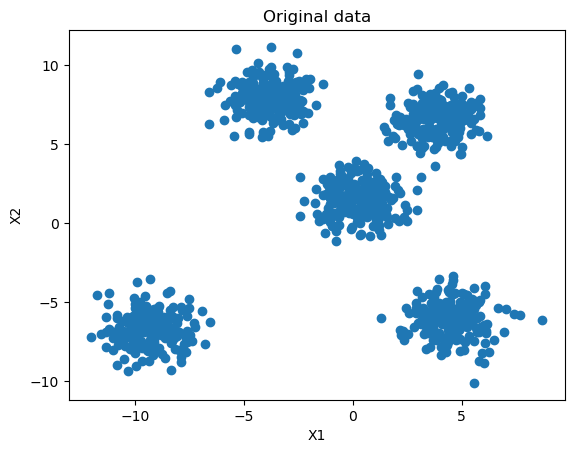

In [6]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=5,cluster_std=1,random_state=101)
plt.scatter(X[:,0],X[:,1])
plt.title("Original data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

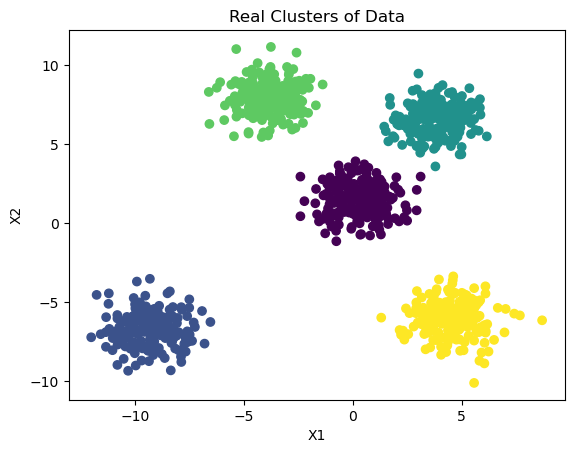

In [7]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=5,cluster_std=1,random_state=101)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Real Clusters of Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

**Train the model**

In [9]:
m,n=X.shape
y_predict,distorsion,U=KmeansNInit(X,k=5,n_iter=300,n_init=10)

**Plot the clusters**

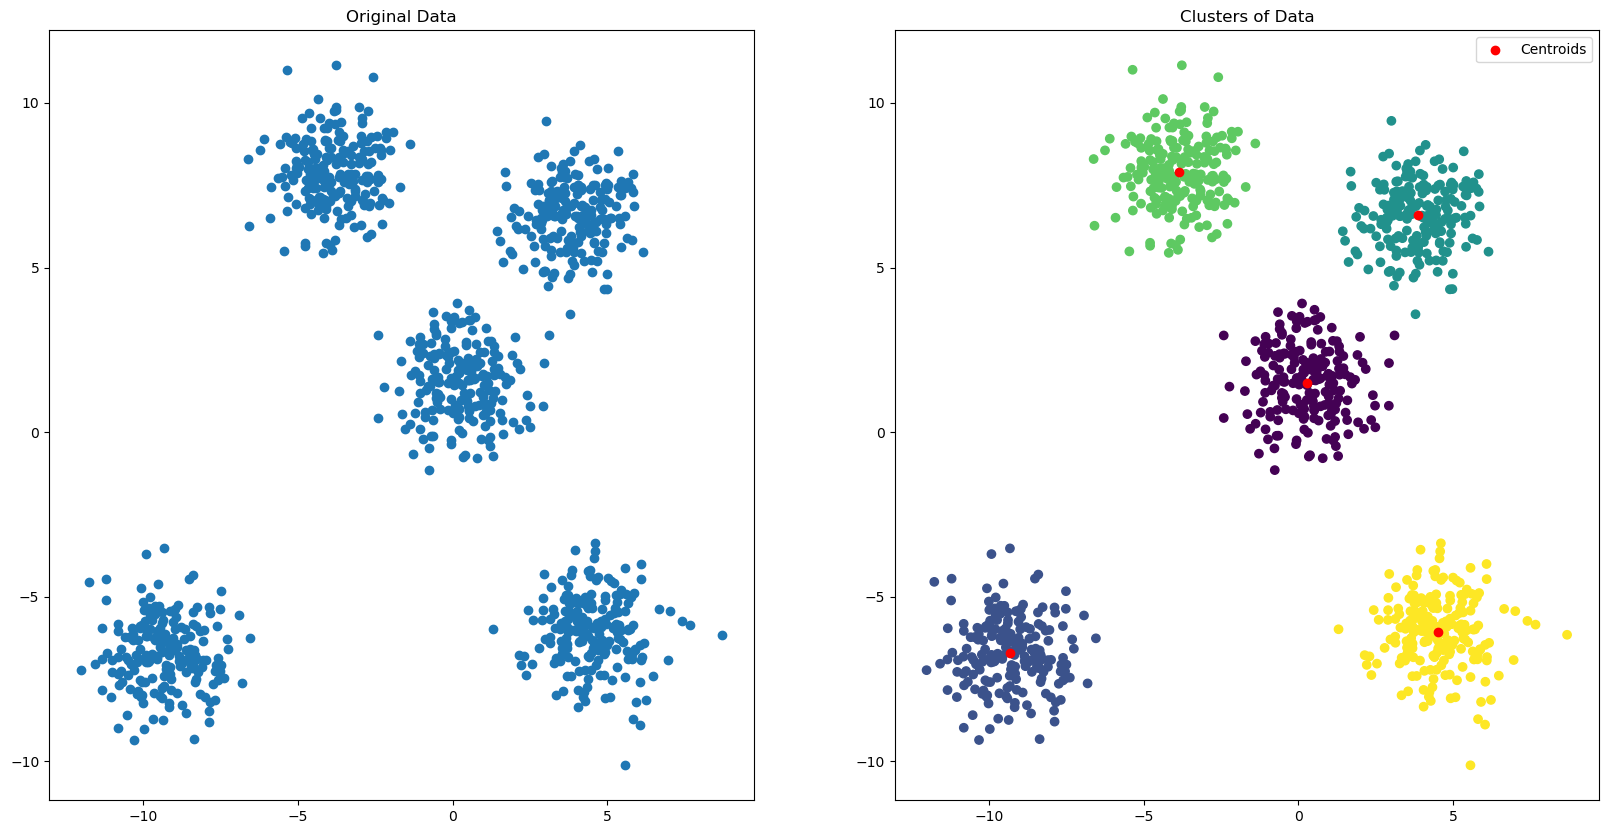

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1])
plt.title("Original Data")
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c=y_predict)
plt.title("Clusters of Data")
plt.scatter(U[:,0],U[:,1],c='r',label="Centroids")
plt.legend()
plt.show()